<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Lab 3.02: Statistical Modeling and Model Validation

> Authors: Tim Book, Matt Brems

---

## Objective
The goal of this lab is to guide you through the modeling workflow to produce the best model you can. In this lesson, you will follow all best practices when slicing your data and validating your model. 

## Imports

In [9]:
# Import everything you need here.
# You may want to return to this cell to import more things later in the lab.
# DO NOT COPY AND PASTE FROM OUR CLASS SLIDES!
# Muscle memory is important!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

## Read Data
The `citibike` dataset consists of Citi Bike ridership data for over 224,000 rides in February 2014.

In [38]:
# Read in the citibike data in the data folder in this repository.
citibike_feb = pd.read_csv('data/citibike_feb2014.csv')


## Explore the data
Use this space to familiarize yourself with the data.

Convince yourself there are no issues with the data. If you find any issues, clean them here.

In [39]:
citibike_feb.head(1)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,294,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,21101,Subscriber,1991,1


In [12]:
citibike_feb.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,gender
count,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000
mean,874.519810,439.203479,40.734366,-73.990386,440.741995,40.734221,-73.990521,18010.598222,1.154617
std,5486.092219,335.723861,0.019031,0.011853,341.497433,0.019048,0.011920,1987.769335,0.436592
min,60.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14529.000000,0.000000
25%,360.000000,305.000000,40.721854,-73.998522,305.000000,40.721816,-73.999061,16302.000000,1.000000
50%,544.000000,403.000000,40.736197,-73.990617,403.000000,40.735877,-73.990741,17975.000000,1.000000
75%,845.000000,490.000000,40.749156,-73.981918,488.000000,40.749013,-73.981948,19689.000000,1.000000
max,766108.000000,3002.000000,40.770513,-73.950048,3002.000000,40.770513,-73.950048,21542.000000,2.000000


In [13]:
citibike_feb.dtypes

tripduration                 int64
starttime                   object
stoptime                    object
start station id             int64
start station name          object
start station latitude     float64
start station longitude    float64
end station id               int64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                  object
gender                       int64
dtype: object

In [14]:
citibike_feb.isnull().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64

In [15]:
#from https://www.citibikenyc.com/system-data
#Gender (Zero=unknown; 1=male; 2=female)
citibike_feb['gender'].unique()

array([1, 2, 0])

In [17]:
#replace '\N' with np.NaN
# citibike_feb['birth year'].replace(to_replace= '\N',value=np.NaN, inplace=True)
citibike_feb['birth year'].iloc[31]= np.NaN

/Users/merylduff/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [18]:
#checking my work
citibike_feb.iloc[31]

tripduration                                   664
starttime                      2014-02-01 00:08:47
stoptime                       2014-02-01 00:19:51
start station id                               237
start station name                 E 11 St & 2 Ave
start station latitude                     40.7305
start station longitude                   -73.9867
end station id                                 349
end station name           Rivington St & Ridge St
end station latitude                       40.7185
end station longitude                     -73.9833
bikeid                                       17540
usertype                                  Customer
birth year                                     NaN
gender                                           0
Name: 31, dtype: object

In [19]:
# turn \\N into np.NaN
citibike_feb.loc[(citibike_feb['birth year']=='\\N')]= np.NaN

In [20]:
# turn year into number
pd.to_numeric(citibike_feb['birth year'])

0         1991.0
1         1979.0
2         1948.0
3         1981.0
4         1990.0
           ...  
224731    1976.0
224732    1985.0
224733    1968.0
224734    1982.0
224735    1960.0
Name: birth year, Length: 224736, dtype: float64

In [21]:
# checking years
citibike_feb['birth year'].unique()

array(['1991', '1979', '1948', '1981', '1990', '1978', '1944', '1983',
       '1969', '1986', '1962', '1965', '1942', '1989', '1980', '1957',
       '1951', '1992', '1971', '1982', '1968', '1984', nan, '1956',
       '1987', '1985', '1996', '1975', '1988', '1974', '1972', '1959',
       '1973', '1977', '1976', '1953', '1993', '1970', '1963', '1967',
       '1966', '1960', '1961', '1994', '1958', '1955', '1946', '1964',
       '1900', '1995', '1954', '1952', '1949', '1947', '1941', '1938',
       '1950', '1945', '1997', '1934', '1940', '1939', '1936', '1943',
       '1935', '1937', '1922', '1932', '1907', '1926', '1899', '1901',
       '1917', '1910', '1933', '1921', '1927', '1913'], dtype=object)

In [22]:
#dropping NaN
citibike_feb.dropna(axis = 0,inplace=True)

In [23]:
citibike_feb['birth year'].sort_values().unique()

array(['1899', '1900', '1901', '1907', '1910', '1913', '1917', '1921',
       '1922', '1926', '1927', '1932', '1933', '1934', '1935', '1936',
       '1937', '1938', '1939', '1940', '1941', '1942', '1943', '1944',
       '1945', '1946', '1947', '1948', '1949', '1950', '1951', '1952',
       '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960',
       '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997'], dtype=object)

-----

## (OPTIONAL) Is average trip duration different by gender?

Conduct a hypothesis test that checks whether or not the average trip duration is different for `gender=1` and `gender=2`. Be sure to specify your null and alternative hypotheses, and to state your conclusion carefully and correctly!

*Note:* We haven't covered this in class yet, so this is a challenge/optional question if you wanted to look into [hypothesis tests](https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce) on your own!

## NOTE TO SELF: RETURN TO THIS!

null hypothessis= there is no relationship between gender and trip duration

hypothesis= there is a relationship between gender and trip durations. I hypothesize that men tend to take longer trips on the bikes because they feel safer to travel long distances, while women tend to bike shorter distances to maintain safety.

(This is not based on outside data, but it is based on my own experiences)

-----

## What numeric columns shouldn't be treated as numeric?

**Answer:** Gender is coded as (Zero=unknown; 1=male; 2=female) and should not be treated as numeric. 

## Dummify the `start station id` variable

In [41]:
# citibike_feb = 
pd.get_dummies(data=citibike_feb, columns=['start station id'])
# citibike_feb

,tripduration,starttime,stoptime,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,...,start station id_2006,start station id_2008,start station id_2009,start station id_2010,start station id_2012,start station id_2017,start station id_2021,start station id_2022,start station id_2023,start station id_3002
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,...,0,0,0,0,0,0,0,0,0,0
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,...,0,0,0,0,0,0,0,0,0,0
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,...,0,0,0,0,0,0,0,0,0,0
3,583,2014-02-01 00:00:32,2014-02-01 00:10:15,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,...,0,0,0,0,0,0,0,0,0,0
4,223,2014-02-01 00:00:41,2014-02-01 00:04:24,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224731,848,2014-02-28 23:57:13,2014-03-01 00:11:21,Broadway & W 32 St,40.748549,-73.988084,432,E 7 St & Avenue A,40.726218,-73.983799,...,0,0,0,0,0,0,0,0,0,0
224732,1355,2014-02-28 23:57:55,2014-03-01 00:20:30,W 20 St & 8 Ave,40.743453,-74.000040,302,Avenue D & E 3 St,40.720828,-73.977932,...,0,0,0,0,0,0,0,0,0,0
224733,304,2014-02-28 23:58:17,2014-03-01 00:03:21,E 17 St & Broadway,40.737050,-73.990093,334,W 20 St & 7 Ave,40.742388,-73.997262,...,0,0,0,0,0,0,0,0,0,0
224734,308,2014-02-28 23:59:10,2014-03-01 00:04:18,S Portland Ave & Hanson Pl,40.685396,-73.974315,365,Fulton St & Grand Ave,40.682232,-73.961458,...,0,0,0,0,0,0,0,0,0,0


## Engineer a feature called `age` that shares how old the person would have been in 2014 (at the time the data was collected).

- Note: you will need to clean the data a bit.

In [26]:
citibike_feb.head(1)

,tripduration,starttime,stoptime,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,...,start station id_2006.0,start station id_2008.0,start station id_2009.0,start station id_2010.0,start station id_2012.0,start station id_2017.0,start station id_2021.0,start station id_2022.0,start station id_2023.0,start station id_3002.0
0,382.0,2014-02-01 00:00:00,2014-02-01 00:06:22,Washington Square E,40.730494,-73.995721,265.0,Stanton St & Chrystie St,40.722293,-73.991475,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# https://stackoverflow.com/questions/35552874/get-first-letter-of-a-string-from-column
citibike_feb['startyear']=citibike_feb['starttime'].str[0:4]
citibike_feb.head(1)

,tripduration,starttime,stoptime,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,...,start station id_2008.0,start station id_2009.0,start station id_2010.0,start station id_2012.0,start station id_2017.0,start station id_2021.0,start station id_2022.0,start station id_2023.0,start station id_3002.0,startyear
0,382.0,2014-02-01 00:00:00,2014-02-01 00:06:22,Washington Square E,40.730494,-73.995721,265.0,Stanton St & Chrystie St,40.722293,-73.991475,...,0,0,0,0,0,0,0,0,0,2014


In [28]:
# cast as int
pd.to_numeric(citibike_feb['startyear'])

0         2014
1         2014
2         2014
3         2014
4         2014
          ... 
224731    2014
224732    2014
224733    2014
224734    2014
224735    2014
Name: startyear, Length: 218019, dtype: int64

In [29]:
#reviewing birth years
#cast as int
pd.to_numeric(citibike_feb['birth year'])

0         1991
1         1979
2         1948
3         1981
4         1990
          ... 
224731    1976
224732    1985
224733    1968
224734    1982
224735    1960
Name: birth year, Length: 218019, dtype: int64

In [30]:
#new column of "age"

citibike_feb['age']=pd.to_numeric(citibike_feb['startyear'])-pd.to_numeric(citibike_feb['birth year'])

In [31]:
# checking my work
citibike_feb['age'].sort_values().unique()

array([ 17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
        30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
        43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
        82,  87,  88,  92,  93,  97, 101, 104, 107, 113, 114, 115])

In [32]:
#dropping ages over 100
citibike_feb.drop(citibike_feb[citibike_feb['age'] > 100].index, inplace = True) 

In [33]:
# checking my work
citibike_feb['age'].sort_values().unique()

array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 87, 88,
       92, 93, 97])

## Split your data into train/test data

**NOTE:** When doing your train/test split, please use random seed 123.

Look at the size of your data. What is a good proportion for your split? **Justify your answer.**

- Because we have a substantial amount of data, I would recommend an 75%-25% split in training and testing groups, respectively. This is because we will be able to train the model on many data points and do not want the model to be high variance, or over-fit to the data. 

In [49]:
citibike_feb.shape

(224736, 15)

Use the `tripduration` column as your `y` variable.
For your `X` variables, use `age`, `usertype`, `gender`, and the dummy variables you created from `start station id`. (Hint: You may find the Pandas `.drop()` method helpful here.)

- could we also create new features comprised of start station id between 0-500, 501-1000, etc. etc

In [101]:
len(citibike_feb['start station id'].unique())

329

In [99]:
citibike_feb.groupby(by='start station id'.count())
# startstationonly.head()
# citibike_feb['start station id'].value_counts(ascending=True).unique()

AttributeError: 'str' object has no attribute 'value_counts'

''

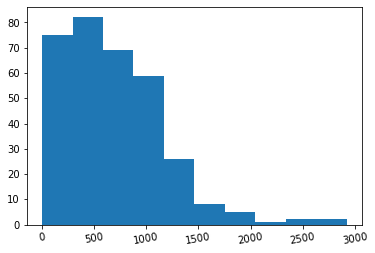

In [88]:
plt.hist(citibike_feb['start station id'].value_counts())
plt.xticks(rotation=10)
;

In [100]:
X=citibike_feb[['age','usertype','gender','start station id']]
y=citibike_feb['tripduration']

KeyError: "['age'] not in index"

## Fit a linear regression model in `sklearn` predicting `tripduration`.

In [59]:
lr=LinearRegression()
lr

LinearRegression()

In [60]:
citibike_feb.dtypes

tripduration               float64
starttime                   object
stoptime                    object
start station id             uint8
start station name          object
start station latitude     float64
start station longitude    float64
end station id             float64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                     float64
usertype                    object
birth year                  object
gender                     float64
startyear                   object
age                          int64
dtype: object

In [61]:
lr.fit(X,y)

LinearRegression()

## Evaluate your model
Look at some evaluation metrics for **both** the training and test data. 
- How did your model do? Is it overfit, underfit, or neither?
- Does this model outperform the baseline? (e.g. setting $\hat{y}$ to be the mean of our training `y` values.)

## Fit a linear regression model in `statsmodels` predicting `tripduration`.

## (OPTIONAL) Using the `statsmodels` summary, test whether or not `age` has a significant effect when predicting `tripduration`.
- Be sure to specify your null and alternative hypotheses, and to state your conclusion carefully and correctly **in the context of your model**!

## Citi Bike is attempting to market to people who they think will ride their bike for a long time. Based on your modeling, what types of individuals should Citi Bike market toward?